# 4D-Var

### Derivation of Strong-Constraint 4D-Var Algorithm for Lorenz-63 model


#### Strong-Constraint 4D-Var Overview

The idea of strong-constraint 4D-Var is that we want to find an *actual solution* to the ODE system given above that "best fits" the data. This approach carries the inherent assumption that the model is perfect if we have the perfect initial condition, which is a decent assumption in our case since we are running a synthetic trial with perturbed observations from this model to begin with.

In other words, we look to find the appropriate initial condition $\mathbf{x}_0 = \mathbf{x}(t_0)$ that produces a solution $\mathbf{x}(t)$ that is "closest" to the data over the entire time interval (where we cannot neglect system dynamics on each of these intervals, due to nonlinearity).

Formally, we look to find an initial condition $\mathbf{x}_0$ that minimizes the cost functional

\begin{equation*}
    J(\mathbf{x}_0) = \frac{1}{2} (\mathbf{x}_0 - \mathbf{x}_0^b)^T (P_0^b)^{-1}(\mathbf{x}_0 - \mathbf{x}_0^b) + \frac{1}{2} \sum_{k=0}^{K} (\mathscr{H}_k(\mathbf{x}_k) - \mathbf{y}_k)^T R_k^{-1}(\mathscr{H}_k(\mathbf{x}_k) - \mathbf{y}_k)
\end{equation*}
subject to
\begin{equation*}
\mathbf{x}_{k+1} = \mathscr{M}_{k+1}(\mathbf{x}_k), \hspace{5pt} k = 0, 1, \ldots, K-1
\end{equation*}
where $\mathscr{M}_k$ and $\mathscr{H}_k$ are the full, nonlinear model ODE and observation operators, $P_0^b$ is the (known) covariance of the background guess for the initial state, and $R_k$ is the (known) covariance of the observation operator.

To minimize this cost functional, we take the gradient of $J$ with respect to the initial condition, $\mathbf{x}_0$.

Note that, given a perturbation $\delta \mathbf{x}_0$ of the initial condition, the first variation is going to have the form
$$ \delta J = \left(\nabla_{\mathbf{x}_0} J\right)^T\delta \mathbf{x}_0$$

Note that we can linearize our model about this perturbation to get a Tangent Linear Model (TLM). This will simplify our analysis by ignoring higher-order behavior of the perturbations, which is often unneccessary to get good results.

The perturbation of the initial condition is propogated through our model using the tangent linear equation

$$\delta \mathbf{x}_{k+1} = M_{k+1} \delta \mathbf{x}_k$$
where $M_{k+1}$ is the Jacobian matrix of $\mathscr{M}_{k+1}$, with partial derivatives of $\mathbf{x}_{k+1}$ with respect to $\mathbf{x}_k$.

Taking the first variation of the cost functional gives
$$\delta J = (\mathbf{x} - \mathbf{x}_0^b)^T(P_0^B)^{-1}\delta \mathbf{x}_0 + \sum_{k=0}^K(\mathscr{H}_k(\mathbf{x}_k) - \mathbf{y}_k)^T R_k^{-1} H_k \delta x_k$$
where $H_k$ is the Jacobian of $\mathscr{H}_k$, the nonlinear observation model at timestep $k$.

Note that we want to explicitly determine the perturbation of the cost functional with respect to the perturbation of the *initial condition*, and that $\delta \mathbf{x}_k$ depends on the perturbation of the intial condition by the relationship
$$\delta \mathbf{x}_{k+1} = M_{k+1}M_{k}\ldots M_{1}M_{0} \delta \mathbf{x}_0$$

Also note that, if we do not have an observation at every timestep that we increment our state, then the linearizations used in the cost functional must be propogated through time appropriately (as in the equation above, multiplying the correct number of Jacobian matrices at each timestep that we have incremented our state vector and not recieved an observation).

Putting this all together, we are going to solve for the minimizer of this cost functional by introducing adjoint state vectors $\mathbf{p}_k$ at each observation timestep $k = 0, 1, \ldots, K$. Since, by our Tangent Linear Model equation, $\delta \mathbf{x}_k = M_k \delta \mathbf{x}_{k-1} $, we have that $\mathbf{p}_k^T (\delta \mathbf{x}_k - M_k \delta \mathbf{x}_{k-1}) =0 $, so adding terms like this to the cost functional does not change its value.

Hence, we now look to minimize the augmented cost functional
$$\delta J = (\mathbf{x} - \mathbf{x}_0^b)^T(P_0^B)^{-1}\delta \mathbf{x}_0 + \sum_{k=0}^K(\mathscr{H}_k(\mathbf{x}_k) - \mathbf{y}_k)^T R_k^{-1} H_k \delta x_k - \sum_{k=0}^K \mathbf{p}_k^T (\delta \mathbf{x}_k - M_k \delta \mathbf{x}_{k-1})$$

Rearranging this equation, exploiting the symmetry of the covariance matrices, and regrouping in terms of each $\delta \mathbf{x}_k$, we have that

$$
\begin{split}
  \delta J = {}& \left[(P_0^B)^{-1}(\mathbf{x}_0 - \mathbf{x}_0^b) + H_0^T R_0^{-1}(\mathscr{H}_0(\mathbf{x}_0) - \mathbf{y}_0) + M_0^T \mathbf{p}_1 \right]\delta \mathbf{x}_0 \\
  &+ \left[\sum_{k=1}^{K-1}H_k^T R_k^{-1}(\mathscr{H}_k(\mathbf{x}_k) - \mathbf{y}_k) - \mathbf{p}_k + M_k^T \mathbf{p}_{k+1}\right] \delta \mathbf{x}_k \\
  &+ \left[H_K^T R_k^{-1} (\mathscr{H}_K(\mathbf{x}_K) - \mathbf{y}_K) - \mathbf{p}_K\right]\delta \mathbf{x}_K
\end{split}
$$

which is valid for any choice of the adjoint states $\mathbf{p}_k$.

So we are going to choose these states such that the only term that survives is $\delta \mathbf{x}_0$.

This means simply that

\begin{align*}
  \mathbf{p}_K &= H_K^T \mathbf{R}_k^{-1} (\mathscr{H}_K(\mathbf{x}_k) - \mathbf{y}_k) \\
  \mathbf{p}_k &= H_k^T R_k^{-1}(\mathscr{H}_k(\mathbf{x}_k) - \mathbf{y}_k) + M_k^T \mathbf{p}_{k+1}, \hspace{20pt}k = K-1, K-2, \ldots, 1 \\
  \mathbf{p}_0 &= (P_0^B)^{-1}(\mathbf{x}_0 - \mathbf{x}_0^b) + H_0^T R_0^{-1}(\mathscr{H}_0(\mathbf{x}_0) - \mathbf{y}_0) + M_0^T \mathbf{p}_1
\end{align*}
Where we have found then that
$$\delta J = \mathbf{p}_0^T \delta \mathbf{x}_0$$
as desired.

So $\mathbf{p}_0$ is the desired gradient that we will use in an iterative gradient descent algorithm.

Note that $\mathbf{p}_0$ depends on all of the other $\mathbf{p}_k$ in an iterative way backwards from $\mathbf{p}_K$.

We define the weighted innovation vector as
$$d_k = H_k^T R_k^{-1}(\mathscr{H}_k(\mathbf{x}_k) - \mathbf{y}_k) $$

Using this notation, we can rewrite this gradient in terms of a gradient on the initial state/background and initial observation ($\delta J^b$), and a gradient on the remaining observations ($\delta J^o$) by fixing
$$\delta J = \delta J^b + \delta J^o$$
where
$$\delta J^b = (P_0^B)^{-1}(\mathbf{x}_0 - \mathbf{x}_0^b)$$
and
$$\delta J^o = d_0 + M_0^T(d_1 + M_1^T(d_2 + M_2^T(\ldots M_{K-1}^T(d_K)))) $$

Hence, the algorithm for 4D-Var amounts to iterating through the following steps:

1. Given a guess for the initial condition, integrate the solution to the ODE forward in time using an ODE solver (like `solve_ivp` provided in scipy) over a given set of time gridpoints. This gives us our $\mathbf{x}_k$.

2. Determine the needed Jacobian matrices $M_k$ and $H_k$ at each observation timestep, as well as the (weighted, nonlinear) innovations terms $d_k$ that depend on each of these.
  
   (Note that if we only have observations at some of the timesteps that we have states at, we need to take matrix products over the time interval between observations to get the correct Jacobians used in our cost functional)

3. Construct the gradient $\delta J^o$ by working backward in time from the last observation timestep to the first observation timestep, multiplying the right sums by the right Jacobians (working inside-out of the equation for $\delta J^o$ given above)

4. Construct the full gradient $\delta J$ by adding $\delta J_o$ to $\delta J^b$.

5. Perform some sort of gradient descent algorithm to find the analyzed initial condition $\mathbf{x}_0^a$ that minimizes the cost functional at this iteration.

6. Repeat steps 1-5 with this new initial condition. Repeat until some sort of convergence is achieved.

<br>

#### Introduction to the Physical Model

We are trying to assimilate data into the Lorenz-63 Model, which is a toy model from meterorology. The model is a first-order ODE system of the form

We wish to assimilate the Lorenz-63 equations by standard 4D-Var, where the Lorenz-63 equations are given by

\begin{align*}
    \frac{dx}{dt} &= -\sigma(x-y) \\
    \frac{dy}{dt} &= \rho x - y - xz \\
    \frac{dz}{dt} &= xy - \beta z
\end{align*}

where $\sigma = 10 $, $\rho = 28$, and $\beta = 8/3$.

This system is known to be chaotic, which makes it a good candidate for testing how well our 4D-Var algorithm performs on a set of data.

<br>

#### Data Source for Experimentation

Since this is a toy model, it is difficult to assimilate real-life datasets with this model. So we will use what the book calls a "twin experiment" or "synthetic run" to evaluate the performance of our algorithm.

In other words, the following process will be used to generate the observation data:

1. Create a "true" solution by giving an ODE solver a "background" initial condition, and then integrate the solution over a time interval. This will be the reference for how well our algorithm behaves.

2. Create "observations" by taking the model solution at various gridpoints (not necessarily at every one), and perturbing it by some mean-zero gaussian value with a given covariance matrix. (This assumes that the observation operator is the identity operator)

This process will give us a set of "true" solutions at each time gridpoint, and then a set of "observations" at a selection of these gridpoints.

<br>

#### Application to the Lorenz-63 system

We have that the Tangent Linear Model/Jacobian for the Lorenz-63 system for going from state timestep $k$ to state timestep $k+1$ (assuming that the length of time between these timesteps is the constant $\Delta t$) is given by

$$ M_{k:k+1} = \begin{pmatrix}
1 - \sigma \Delta t & \sigma \Delta t & 0 \\
(\rho - z_k) \Delta t & 1 - \Delta t & -x_k \Delta t \\
y_k \Delta t & x_k \Delta t & 1 - \beta \Delta t
\end{pmatrix} $$

Our data assimilation method only has observed data at every other timestep where we run our model. So we actually need to multiply two of these matrices together to get the $M_k$ values used in the cost functional.

Also, by the data generation algorithm given above, we have that the observation operator is given by
$$\mathscr{H}_k(x_k,y_k,z_k) = (x_k,y_k,z_k)$$
which is just the identity opertaor, and thus,
$$H_k = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}$$
is the desired Jacobian used in our algorithm.


In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from functools import reduce
from ast import literal_eval

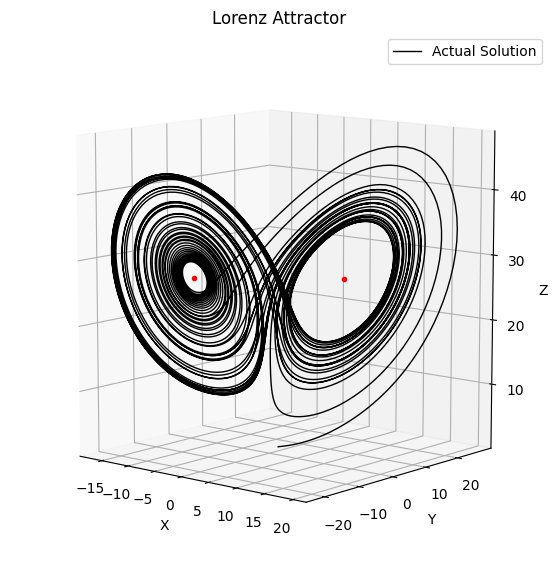

In [3]:
# Parameters of Lorenz-63 system
sigma = 10
rho = 28
beta = 8/3

# The Lorenz-63 system
def lorenz(t, x):
    """ The Lorenz-63 System
        x: ndarray(3,)
     """
    return np.array([-sigma*(x[0] - x[1]),
                    rho*x[0] - x[1] - x[0]*x[2],
                    x[0]*x[1] - beta*x[2] ])

# Solve Lorenz for actual solution
t_span = (0, 50)
t = np.linspace(0, 50, 10000)
x0 = np.ones(3)
example_sol = solve_ivp(lorenz, t_span, x0, t_eval=t)


# Plot the example solution
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.plot(example_sol.y[0,:], example_sol.y[1,:], example_sol.y[2,:], color='k', linewidth=1, label='Actual Solution')
ax.plot(np.sqrt(beta*(rho - 1)), np.sqrt(beta*(rho - 1)), rho-1, 'o', markersize=3, color='r')
ax.plot(-np.sqrt(beta*(rho - 1)), -np.sqrt(beta*(rho - 1)), rho-1, 'o', markersize=3, color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect(aspect=(1,1,1.1), zoom=0.95)
ax.view_init(10, -50, 0)
ax.set_title("Lorenz Attractor")
ax.legend()
plt.show()
fig.savefig("graphics/lorenz_graph.png")

/var/folders/x_/vtkqq9c562v45n61xlf3t5cr0000gq/T/ipykernel_27339/2332863315.py:103: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


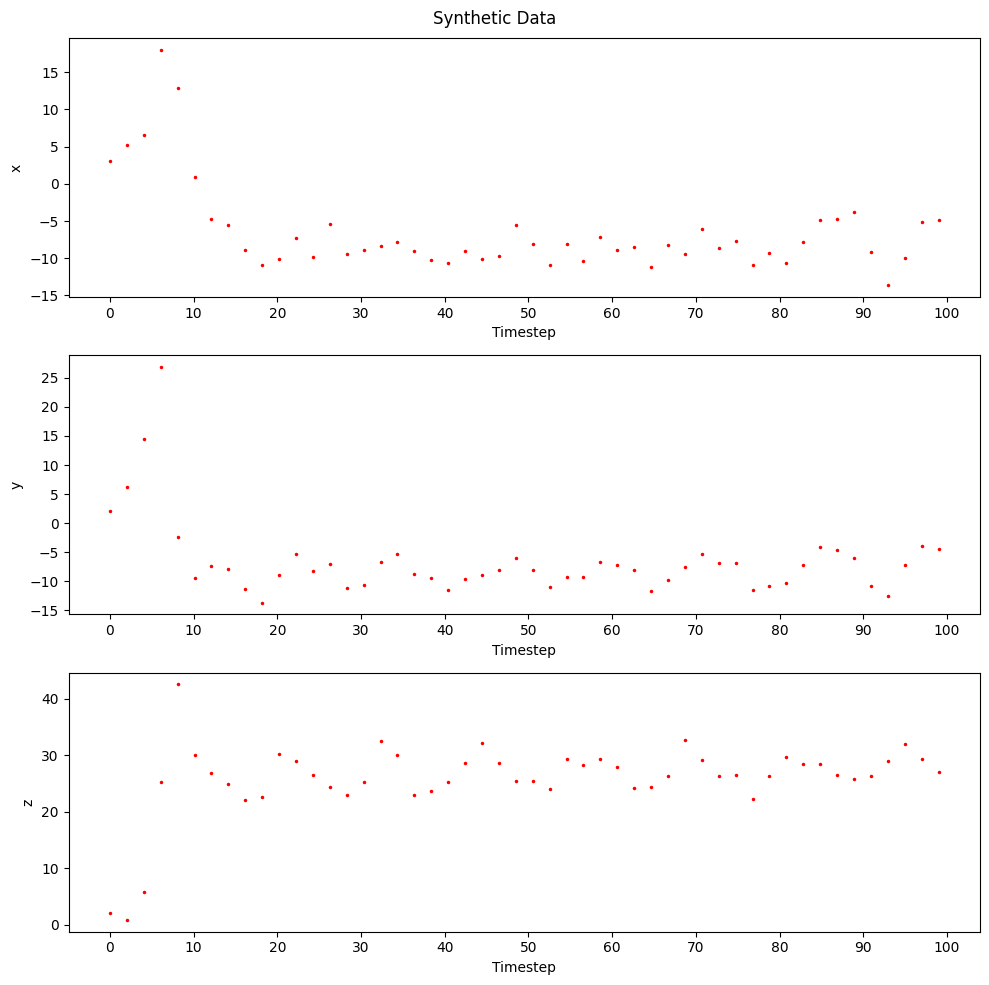

In [6]:
# Generate toy data for assimilation
def get_observed_data(actual_data, covar):
    """Get observed datapoints given actual datapoints and
    an amount of noise/covariance.

    Parameters:
        actual_data ((n,t) ndarray) - Actual datapoints at
          each timestep
        covar ((n,n) ndarray) - The covariance to use for
          noise of observations

    Returns:
        observed_data ((n,t) ndarray) - Perturbed datapoints
          at each timestep
        data_slice (Index Slice) - The slice of indexes we kept
    """
    n, t = actual_data.shape
    mu = np.zeros(n)
    perturbations = np.random.multivariate_normal(mu, covar, t).T
    all_observations = actual_data + perturbations
    return np.delete(all_observations, np.s_[1::2], axis=1), np.s_[::2] # we only want observations at every 2 time steps


def get_Li(state: np.ndarray,
             dt: float) -> np.ndarray:
    """Gets the TLM of the Lorenz equations.

    Parameters:
        state ((3,) ndarray): The model-integrated/forecast state
            at the current timestep.
        dt (float): The size of the timestep in our evaluation.

    Returns:
        L
         ((3,3) ndarray): The TLM for the Lorenz model.
    """
    x,y,z = state
    L = np.array([
        [1 - sigma * dt, sigma * dt, 0],
        [(rho - z) * dt, 1 - dt, -x * dt],
        [dt * y, dt * x, 1 - beta * dt]
    ])  # TLM derived from perturbing ODE and ignoring higher order terms

    return L


def get_di(state: np.ndarray,
           obs: np.ndarray,
           H: callable,
           H_linear: np.ndarray,
           R_inv: np.ndarray,) -> np.ndarray:
    """Get the weighted innovation vector at a specific timestep.

    Currently not vectorized, could be improved by vectorizing over
    entire time interval.

    Parameters:
        state ((n,) ndarray): The (forecast) state (resulting from
            a forward integration of the nonlinear model)
        obs ((m,) ndarray): The observations at each timestep.
        H (callable): The (potentially nonlinear) observation operator,
            vectorized to handle an entire vector of observations.
        H_linear ((n,m) ndarray): The linearized version of the observation
            operator (partial H/partial x_i).
        R_inv ((m,m) ndarray): The inverse of the background covariance
            matrix.

    Returns:
        d_i (np.ndarray): The weighted innovation vectors at each
            timestep.
    """
    unweighted_innovation = H(state) - obs
    return -H_linear.T @ R_inv @ unweighted_innovation

# Get actaul solution (to compare 4D-Var against)
t_span = (0, 5)
t = np.linspace(0, 5, 100)  # 5 seconds with time steps of 0.05
x0_true = np.ones(3)           # true/background initial condition
sol = solve_ivp(lorenz, t_span, x0_true, t_eval=t)

# Get observed data for the above actual solution (for assimilation)
# NOTE: Observed data starts at timestep 1 (not 0), and only is
# found at every other timestep of the solution sol.y
# (aka, indexes 1, 3, 5, ..., or in other words, sliced by [1::2])
R = np.array([
    [3,2,1],
    [2,2,2],
    [1,2,4]
])
observed_data, data_slice = get_observed_data(sol.y, R)

# Plot this all on the same axis
fig, axs = plt.subplots(3, figsize=(10,10))
plt.setp(axs, xticks=np.arange(0, 10.5, 0.5), xticklabels=np.arange(0, 210, 10))
for i, (ax, label) in enumerate(zip(axs, ['x', 'y', 'z'])):
    ax.set_ylabel(label)
    ax.set_xlabel('Timestep')
    ax.plot(t[data_slice], observed_data[i,:], 'r.', ms=3, label='Observations')

fig.suptitle("Synthetic Data")
fig.tight_layout()
plt.savefig("graphics/synth_data.png")
fig.show()

In [7]:
# Code up one iteration of inner loop to try this out
def analyze_4dvar_lorenz(
    t: np.ndarray,
    x0_b: np.ndarray,
    data: np.ndarray,
    B: np.ndarray,
    R: np.ndarray,
    H: callable,
    H_linear: np.ndarray,
    tol: float=1e-6,
    maxiter: int=100,
    data_slice: np.lib.index_tricks.IndexExpression=np.s_[:],
    verbose: bool=False,
    alpha: float = 0.01
    )-> np.ndarray:
    """Get the analyzed solution to a Lorenz-63 DA problem using 4D-Var.

    Parameters:
        t ((t,) ndarray): The timesteps to evaluate the solution at.
        x0_b ((3,) ndarray): The background for the initial condition.
        data ((m,t*) ndarray): The data for assimilation with the Lorenz-63
            model (must have at least 2 observations)
        B ((3,3) ndarray): The covariance matrix for the background
            initial condition.
        R ((m,m) ndarray): The covariance matrix for the observations.
        H (callable): The (potentially nonlinear) observation operator,
            transforming states to observations.
        H_linear ((3,m) ndarray): The linearized observation operator
            (must be the same at each timestep for this function)
        data_slice (IndexExpression): If provided, the slices for the timesteps
            at which data are provided (if not provided, assumed to be at
            all timesteps)
        verbose (boolean): Whether or not to print out status reports during
            runtime (default is False)
        alpha (float): The gradient descent step length parameter (default
            is 0.01)

    Returns:
        analysis ((t,3) ndarray): The analyzed state after using 4DVar.
    """
    # Setup inverse matrices and other needed parameters
    B_inv = np.linalg.inv(B)
    R_inv = np.linalg.inv(R)
    t_span = (np.min(t), np.max(t))   # Min and max time on interval
    dt = t[1] - t[0]                  # Size of timestep

    # Set up cost function
    J = lambda x: 0.5 * (x[0] - x0_b).T @ B_inv @ (x[0] - x0_b) \
                  + 0.5 * np.sum([(H(x) - y).T @ R_inv @ (H(x) - y)
                  for x,y in zip(x[data_slice], data.T)])

    # Get indexes of timesteps we have data at
    data_times = np.arange(len(t))[data_slice]
    padded_data_times = list(data_times)         # Used for calculating adjoint
    if min(data_times) != 0:
        padded_data_times.insert(0, 0)
    if max(data_times) != len(t) - 1:
        padded_data_times.append(len(t) - 1)

    # --------------- 4D-Var Loop ------------------
    norm_grad_J = np.inf
    best_J = np.inf
    numiter = 0
    x0_a = x0_b.copy()     # Analyzed initial condition (start at background)
    success = False
    while norm_grad_J > tol and numiter < maxiter:
        if verbose and numiter%500==0:
            print(f"ITERATION:  {numiter}")

        ## Step 1: Run full nonlinear model to get forecast state
        ## (AKA forward integration)
        sol = solve_ivp(lorenz, t_span, x0_a, t_eval=t)
        state_a = sol.y    # Shape is (3,t)

        ## Step 2: Get adjoint/innovation information using this state
        # Get (non-transposed) TLM using the current states and timesteps
        Li_raw = []
        for state in state_a.T:
            Li_raw.append(get_Li(state, dt))

        # Combine (transposed) adjoints at correct timesteps
        # to align correctly with states
        adjoints = [
            (reduce(np.dot, Li_raw[start:end])).T
            for start,end
            in zip(padded_data_times[:-1], padded_data_times[1:])
            ]

        # Get weighted innovations
        innovations = []
        for state, obs in zip(state_a.T[data_slice], data.T):
            innovations.append(get_di(state, obs, H, H_linear, R_inv))

        ## Step 3: Work "backwards in time" to get gradient of J_o
        grad_J_o = innovations[-1]
        for adjoint, innovation in zip(adjoints[::-1], innovations[:-1:-1]):
            grad_J_o = innovation + adjoint @ grad_J_o

        ## Step 4: Get full gradient
        grad_J_b = B_inv @ (x0_a - x0_b)
        grad_J = grad_J_b + grad_J_o
        norm_grad_J = np.linalg.norm(grad_J, ord=2)
        if verbose and numiter%500 == 0:
            print(f"  GRADIENT:  {grad_J}")
            print(f"  L2-NORM OF GRADIENT:  {norm_grad_J}")

        ## Step 5: If we have converged, break.
        ## Otherwise, run full gradient descet algorithm
        # Check for convergence (gradient being "small enough")
        if norm_grad_J < tol:
            success = True
            break

        # Gradient descent that works (fixed rate)
        alpha_used = alpha
        if norm_grad_J < 1:   # Smaller step size for smaller gradient
            alpha_used *= 0.1
        if norm_grad_J < 0.1:
            alpha_used *= 0.05
        x0_a -= alpha_used * grad_J
        if verbose and numiter%500 == 0:
            print(f"  NEW x0_a:  {x0_a}")

        # Set up for next iteration
        numiter += 1


    # End of algorithm. Check for successful convergence
    if not success:
        print(f"WARNING: Algorithm did not converge in {maxiter} iterations")

    # Get analyzed state by integrating with new, analyzed initial condition,
    # and return it
    print(f"FINAL x0_a:  {x0_a}")
    print(f"FINAL GRADIENT NORM: {norm_grad_J}")
    sol = solve_ivp(lorenz, t_span, x0_a, t_eval=t)
    state_a = sol.y    # Shape is (3,t)
    return state_a

FINAL x0_a:  [0.32023749 0.89645914 0.75543922]
FINAL GRADIENT NORM: 0.049998070657670715


/var/folders/x_/vtkqq9c562v45n61xlf3t5cr0000gq/T/ipykernel_27339/4122708702.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


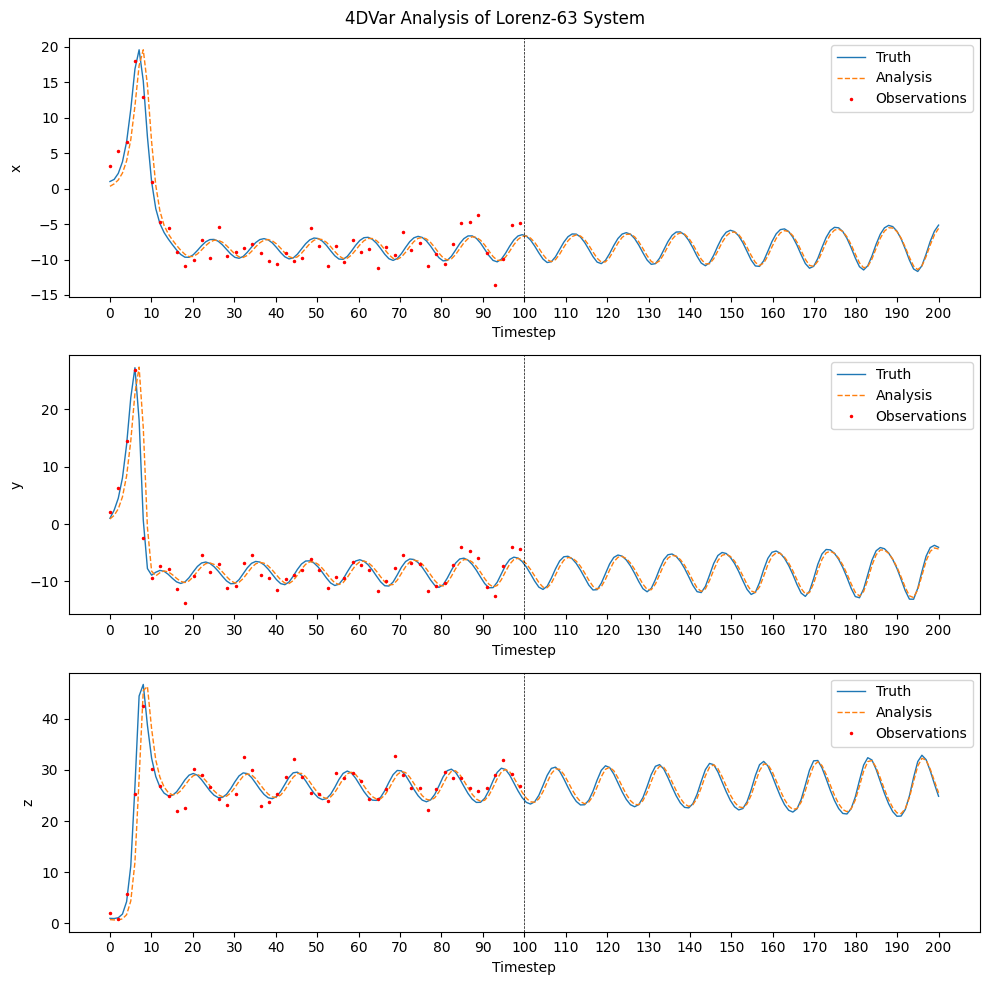

In [8]:

# Get model covariance matrix (overestimate is good since we don't know
# how much to trust the model)
B = np.eye(3)
R_perturbed = np.eye(3) * 5
# Get observation operators (full and linearized)
H = lambda x: x
H_linear = np.eye(3)

# Get the analysis
alpha_size = 0.01
x0_b = np.array([0.7, 1.2, 0.9])
analysis = analyze_4dvar_lorenz(t, x0_b, observed_data, B, R_perturbed, H, H_linear,
                                data_slice=data_slice, maxiter=20000, tol=5e-2,
                                verbose=False, alpha=alpha_size)

# Forecast both actual and anlyzed solutions to double the time
t_span_long = (0, 10)
t_long = np.linspace(0, 10, 200)

# Actual solution
x0_b = np.ones(3)           # true/background initial condition
actual_sol = solve_ivp(lorenz, t_span_long, x0_b, t_eval=t_long)

# Analyzed solution forecast
x0_a = analysis[:,0]
analyzed_forecast_sol = solve_ivp(lorenz, t_span_long, x0_a, t_eval=t_long)

# Plot this all on the same axis
fig, axs = plt.subplots(3, figsize=(10,10))
plt.setp(axs, xticks=np.arange(0, 10.5, 0.5), xticklabels=np.arange(0, 210, 10))
for i, (ax, label) in enumerate(zip(axs, ['x', 'y', 'z'])):
    ax.set_ylabel(label)
    ax.set_xlabel('Timestep')
    ax.plot(t_long, actual_sol.y[i,:], label='Truth', lw=1)
    ax.plot(t_long, analyzed_forecast_sol.y[i,:], '--', label='Analysis', lw=1)
    ax.plot(t[data_slice], observed_data[i,:], 'r.', ms=3, label='Observations')
    ax.axvline(5, linestyle='--', color='k', lw=0.5)
    ax.legend()

fig.suptitle("4DVar Analysis of Lorenz-63 System")
fig.tight_layout()
plt.savefig("graphics/good_example_2.png")
fig.show()


### Climate Data Assimilation

Lorenz-63 model is a simplified version of an atmospheric model used for weather forcast. In this context, each of the variables x, y, z represents a specific state of the atmosphere. For example, x can represent temperature, y can represent humidity, and z can represent pressure. Although the model is overly simplified and shouldn't really be used for weather forcast, we found some real world data that could be used for data assimilation using our model. The data was obtained from https://caas.usu.edu/weather/ and contains 4-year temperature, humidity, and barometric pressure data.

The data is first transformed to match the expected values of the Lorenz-64 model output with the specified parameter values as before. The transformed data is then used to fit the model, and the resulting model output is inversely transformed to represent the values of the original observed data. This transformation can be viewed as our observation model $\mathscr{H}_k$. 

/var/folders/x_/vtkqq9c562v45n61xlf3t5cr0000gq/T/ipykernel_27339/2727954084.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


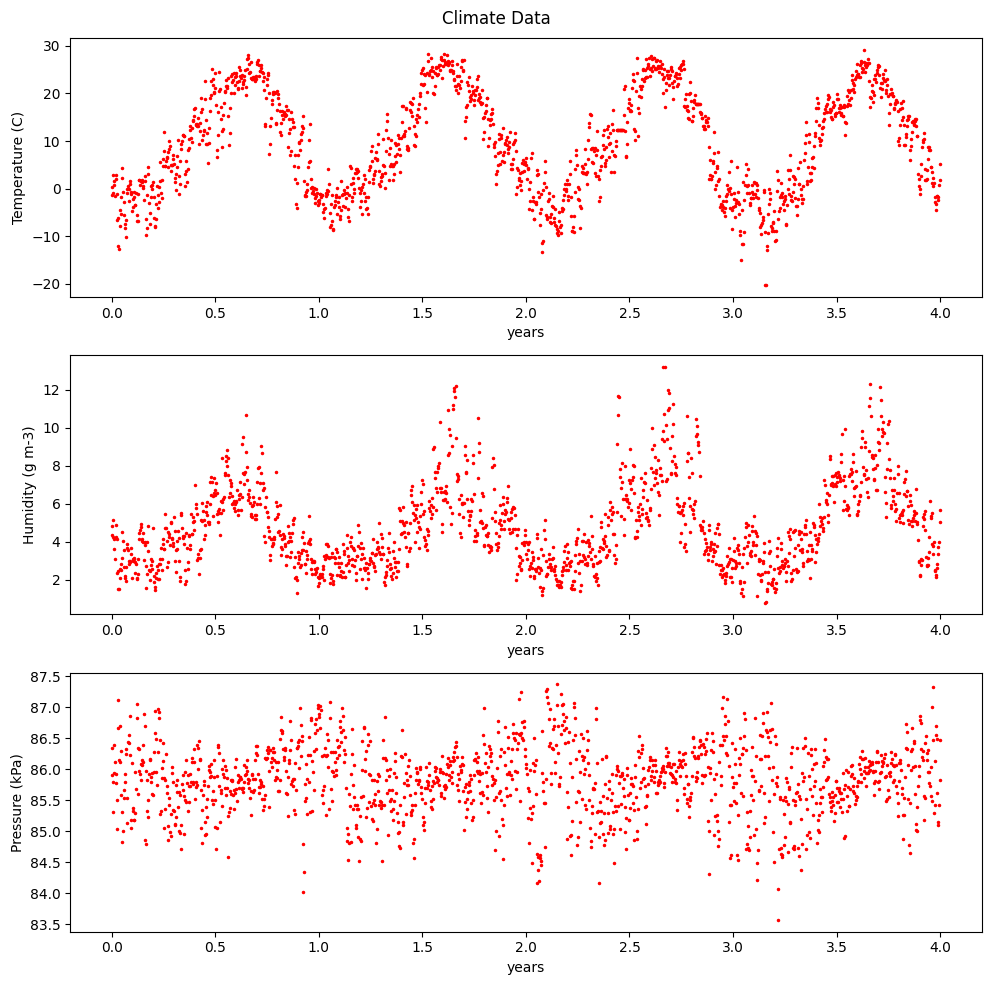

In [10]:
# Load data
f = open("usu_data/pressure.txt")
pressure = np.array(literal_eval(f.read()))
f.close()

f = open("usu_data/abs_humidity.txt")
abs_humidity = np.array(literal_eval(f.read()))
f.close()

f = open("usu_data/temperature.txt")
temperature = np.array(literal_eval(f.read()))
f.close()

# There were some missing temperature data. 
# The average value surrounding the data
# was used to fill in the missing values.
temperature[890:902, 1] = (temperature[889, 1] + temperature[902, 1]) / 2
temperature[1029:1037, 1] = (temperature[1028, 1] + temperature[1037, 1]) / 2

observed_data = np.zeros((3, temperature.shape[0]))
observed_data[0] = temperature[:, 1]
observed_data[1] = abs_humidity[:, 1]
observed_data[2] = pressure[:, 1]
t = np.linspace(0, 4, temperature.shape[0])
# Plot this all on the same axis
fig, axs = plt.subplots(3, figsize=(10,10))
for i, (ax, label) in enumerate(zip(axs, ['Temperature (C)', 'Humidity (g m-3)', 'Pressure (kPa)'])):
    ax.set_ylabel(label)
    ax.set_xlabel('years')
    ax.plot(t, observed_data[i,:], 'r.', ms=3, label='Observations')

fig.suptitle("Climate Data")
fig.tight_layout()
fig.show()
fig.savefig("graphics/usu_data.png")

In [11]:
def data_transform(x):
    data = np.zeros((3, t.shape[0]))
    data[0] = x[0]/4 + 5
    data[1] = x[1] + 1
    data[2] = 8*(x[2]-83)
    return data

def inv_transform(x):
    x[0] = 4*(x[0] - 5)
    x[1] = x[1] - 1
    x[2] = x[2]/8 + 83
    return x

In [12]:
# Get actaul solution (to compare 4D-Var against)
t_span = (0, 2.6)
t = np.linspace(0, 2.6, observed_data.shape[1])  # 5 seconds with time steps of 0.05
x0_true = np.ones(3)           # true/background initial condition
sol = solve_ivp(lorenz, t_span, x0_true, t_eval=t)

# Get observed data for the above actual solution (for assimilation)
# NOTE: Observed data starts at timestep 1 (not 0), and only is
# found at every other timestep of the solution sol.y
# (aka, indexes 1, 3, 5, ..., or in other words, sliced by [1::2])

transformed_data = data_transform(observed_data)

# Get model covariance matrix (overestimate is good since we don't know
# how much to trust the model)
B = 2*np.eye(3)
R_perturbed = np.eye(3) * 5
# Get observation operators (full and linearized)
H = lambda x: x
H_linear = np.eye(3)

# Get the analysis
alpha_size = 0.01
x0_b = np.array([5.1, 5.3, 22.8])
analysis = analyze_4dvar_lorenz(t, x0_b, transformed_data, B, R_perturbed, H, H_linear,
                                maxiter=50000, tol=5e-2,
                                verbose=False, alpha=alpha_size)

FINAL x0_a:  [ 5.71278877  3.11436604 25.03484356]
FINAL GRADIENT NORM: 0.04999953611187953


/var/folders/x_/vtkqq9c562v45n61xlf3t5cr0000gq/T/ipykernel_27339/3585615964.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


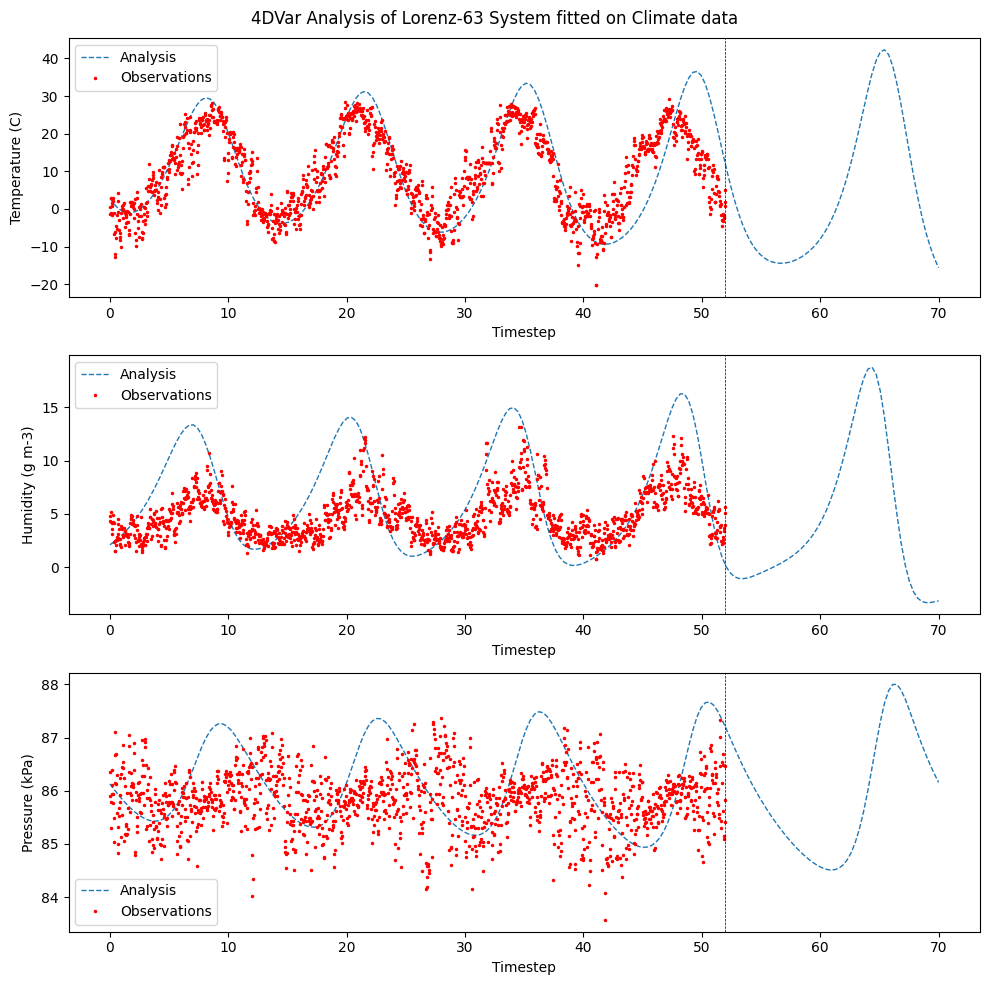

In [14]:
t_span_long = (0, 3.5)
t_long = np.linspace(0, 3.5, 200)

# Analyzed solution forecast
x0_a = analysis[:,0]
analyzed_forecast_sol = solve_ivp(lorenz, t_span_long, x0_a, t_eval=t_long)
y = inv_transform(analyzed_forecast_sol.y)
data_orig = np.zeros((3, temperature.shape[0]))
data_orig[0] = temperature[:, 1]
data_orig[1] = abs_humidity[:, 1]
data_orig[2] = pressure[:, 1]
# Plot this all on the same axis
fig, axs = plt.subplots(3, figsize=(10,10))
plt.setp(axs, xticks=np.arange(0, 10.5, 0.5), xticklabels=np.arange(0, 210, 10))
for i, (ax, label) in enumerate(zip(axs, ['Temperature (C)', 'Humidity (g m-3)', 'Pressure (kPa)'])):
    ax.set_ylabel(label)
    ax.set_xlabel('Timestep')
    ax.plot(t_long, y[i], '--', label='Analysis', lw=1)
    ax.plot(t, data_orig[i,:], 'r.', ms=3, label='Observations')
    ax.axvline(2.6, linestyle='--', color='k', lw=0.5)
    ax.legend()

fig.suptitle("4DVar Analysis of Lorenz-63 System fitted on Climate data")
fig.tight_layout()
fig.show()
fig.savefig("graphics/usu_out.png")